0.19915557573470208
0.20950350792681402


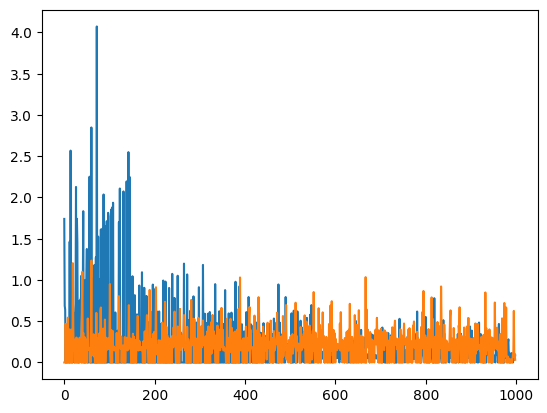

In [16]:
import json
import os
import matplotlib.pyplot as plt

name = "1000-1000-50"

ours_path = f"results/ours-{name}-tp.json"
with open(ours_path) as f:
    ours_data = json.load(f)
ours_lats = ours_data['req_end_deltas']

vllm_path = f"results/vllm-{name}-tp.json"
with open(vllm_path) as f:
    vllm_data = json.load(f)
vllm_lats = vllm_data['req_end_deltas']

xs = len(ours_lats)
plt.plot(range(xs), ours_lats, label="Ours")
plt.plot(range(xs), vllm_lats, label="VLLM")

print(sum(ours_lats) / xs)
print(sum(vllm_lats) / xs)

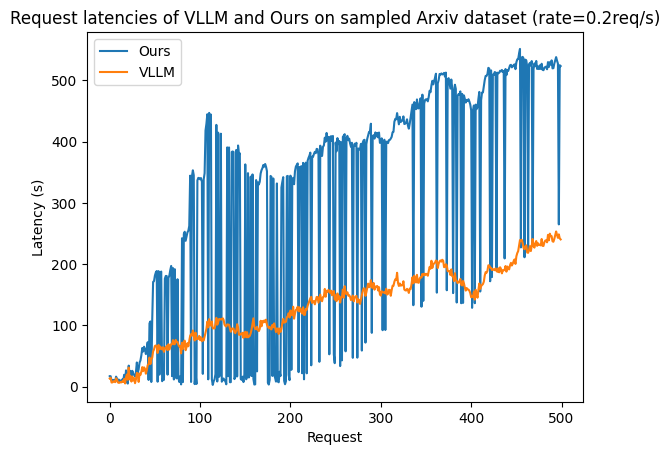

In [15]:
import json
import os
import matplotlib.pyplot as plt

ours_path = "results/ours-arxiv-lat-0_22.json"
with open(ours_path) as f:
    ours_data = json.load(f)
ours_lats = [x['end'] - x['start'] for x in ours_data]

vllm_path = "results/vllm-arxiv-lat-0_22.json"
with open(vllm_path) as f:
    vllm_data = json.load(f)
vllm_lats = [x['end'] - x['start'] for x in vllm_data]

xs = len(ours_lats)
# ours_lats = sorted(ours_lats)
# vllm_lats = sorted(vllm_lats)
plt.plot(range(xs), ours_lats, label="Ours")
plt.plot(range(xs), vllm_lats, label="VLLM")
plt.xlabel("Request")
plt.ylabel("Latency (s)")
plt.title("Request latencies of VLLM and Ours on sampled Arxiv dataset (rate=0.2req/s)")

plt.legend()